## Import Modules and Agent Types

In [1]:
import random as rnd
import operator
import os
import matplotlib.pyplot as plt                 # import matplotlib
import numpy as np                              # import numpy
import time
import copy
import json

import sys

sys.path.insert(0, '..') # add modules folder (parent folder) into this notebook's path
import institutions.dm_bargain as dm_bargain
import institutions.dm_travel as dm_travel
import environment.dm_agents as dm_agents
import environment.dm_env as env
import dm_utils as dm
import simulations.dm_sim_period as simulate
import dm_process_results as results
import environment.env_make_agents as make_env

# Agent Types

ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer
trader_objects = [ZIDP, ZIDP]     


# Runner for running weeks

In [2]:
def print_contracts(contracts):
    print("CONTRACTS:")
    print("rnd, b_cu:b_val -price- s_cos:s_cu  buyer_id, seller_id")
    print("-------------------------------------------------------")
    for contract in contracts:
        round = contract[0]
        price = contract[1]
        buyer = contract[2]
        seller = contract[3]
        b_cur = contract[4]
        b_val = contract[5]
        s_cur = contract[6]
        s_cos = contract[7]
        print(f"{round:2} {b_cur:3}:{b_val:4} -{price:4}-{s_cos:4}{s_cur:3}    {buyer:10} {seller:10}")


def print_grid(grid):
    for k_loc in grid:
        print('point', k_loc,' --> ',grid[k_loc])
        
def make_locs(agents):
    x = []
    for agent in agents:
        y = agent.get_location()
        x.append(y)
    return x


def make_simulation(num_periods, num_weeks,
                   num_rounds, grid_size,
                   num_traders, num_units,
                   lower_bound, upper_bound,
                   trader_objects):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
    """ 

    effs = []
    type_effs = []
    sim_grids = {}
    
    
    # make agents
    agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug)
    agent_maker.make_agents()
    agent_maker.set_locations(grid_size)
    agents = agent_maker.get_agents()

    # set up market
    agent_maker.make_market("test_market")
    market = agent_maker.get_market()

    # run sim
    for week in range(num_weeks):
        for agent in agents:
            agent.start(None)
        contracts = []
        sim_grids[week] = []
        sim1 = simulate.SimPeriod(sim_name, num_rounds, agents, 
               market, grid_size, debug, plot_on)
        for period in range(num_periods):
            sim1.run_period()
            grid = sim1.get_grid()
            sim_grids[week].append(grid)
            contracts.extend(sim1.get_contracts())
        
        # process results
        pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug)
        pr1.get_results()
        eff = pr1.get_efficiency()
        effs.append(eff)
        type_eff = pr1.get_type_surplus()
        type_effs.append(type_eff)  
    return effs, type_effs, sim_grids



## Test ZID

In [3]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [ZID, ZID]     # List of artificial traders, length 2, can be same
sim_name = "test_one"           # will be the folder name
plot_on = False                 # Plots each week
debug = False                   # Provide verbose information   

num_periods = 7
num_weeks = 50
num_rounds = 5
grid_size = 15
num_traders = 20
num_units = 8
lower_bound = 200 
upper_bound = 600

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZIDA traders"
data_table_6, type_surplus_table, sim_grids = make_simulation(num_periods,
                   num_weeks,
                   num_rounds, grid_size,
                   num_traders, num_units,
                   lower_bound, upper_bound,
                   trader_objects)

# how sim_grids is organized
"""
for week in range(num_weeks):
    print('week', week)
    week_grids = sim_grids[week]
    for period, period_grid in enumerate(week_grids):
        print('period', period)
        print_grid(period_grid)
    print("-----")
"""
#
week_len = []
occ_len = []
for week in range(num_weeks):
    week_grids = sim_grids[week]
    loc_len = []
    for period, period_grid in enumerate(week_grids):
        loc_len.append(len(period_grid))
    last_occupied = []
    for loc in period_grid:
        last_occupied.append(len(period_grid[loc]))
    occ_len.append(last_occupied)
    week_len.append(loc_len)
    
print('final summary')
min_lengths = []
for week in range(num_weeks):
    min_len = min(week_len[week])
    min_lengths.append(min_len)
    print(week, min_len, data_table_6[week])
    print(occ_len)


TypeError: cannot unpack non-iterable type object

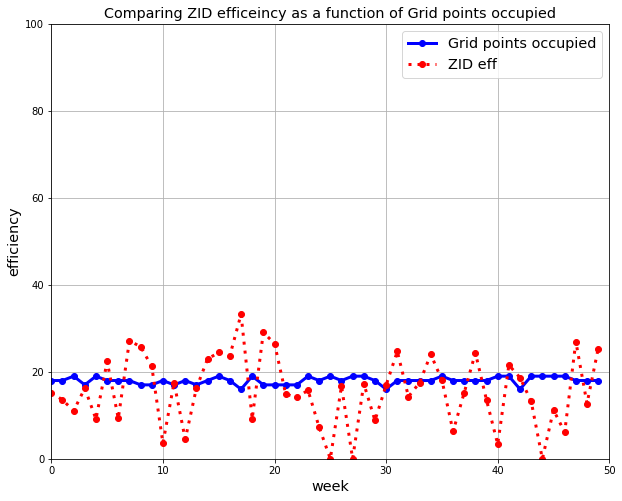

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))  
ax.plot(min_lengths, label = 'Grid points occupied', linestyle = 'solid', color='blue', marker = "o", lw =3)
ax.plot(data_table_6, label = 'ZID eff', linestyle = (0, (1, 2)), color='red', marker = "o", lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, num_weeks)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('Comparing ZID efficeincy as a function of Grid points occupied', size = 'x-large')
ax.legend(fontsize='x-large')

## Test ZIDA

In [69]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [ZIDA, ZIDA]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

num_periods = 7
num_weeks = 50
num_rounds = 5
grid_size = 15
num_traders = 20
num_units = 8
lower_bound = 200 
upper_bound = 600

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZIDA traders"
data_table_7, type_surplus_table, sim_grids = make_simulation(num_periods,
                   num_weeks,
                   num_rounds, grid_size,
                   num_traders, num_units,
                   lower_bound, upper_bound,
                   trader_objects)

week_len = []
occ_len = []
for week in range(num_weeks):
    week_grids = sim_grids[week]
    loc_len = []
    for period, period_grid in enumerate(week_grids):
        loc_len.append(len(period_grid))
    last_occupied = []
    for loc in period_grid:
        last_occupied.append(len(period_grid[loc]))
    occ_len.append(last_occupied)
    week_len.append(loc_len)
    
print('final summary')
min_lengths = []
for week in range(num_weeks):
    min_len = min(week_len[week])
    min_lengths.append(min_len)
    print(week, min_len, data_table_7[week])
    print(occ_len)


final summary
0 17 4.370261162594777
[[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1], [2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1], [1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1], [1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1], [1, 4, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1], [1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1], [2, 4, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1], [3, 4, 1, 3, 1, 1, 1, 1, 3, 1, 1], [3, 4, 4, 3, 1, 1, 1, 1, 1, 1], [3, 5, 4, 3, 1, 1, 1, 1, 1], [3, 5, 4, 3, 1, 1, 1, 1, 1], [3, 5, 4, 3, 1, 1, 1, 1, 1], [3, 5, 4, 3, 1, 1, 1, 1, 1], [3, 5, 4, 3, 1, 1, 1, 1, 1], [3, 5, 4, 4, 1, 1, 1, 1], [3, 5, 4, 4, 1, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 5, 5, 4, 1, 1, 1], [3, 6, 5, 4, 1, 1], [3, 6, 5, 4, 1, 1], [3, 6, 5, 4, 1, 1], [3, 6, 5, 4, 1, 1], [3, 6, 6, 4, 1], [3, 6, 6, 4, 1], [3, 6, 6, 4, 1], [3, 6, 6, 4, 1], [3, 6, 7, 4], [

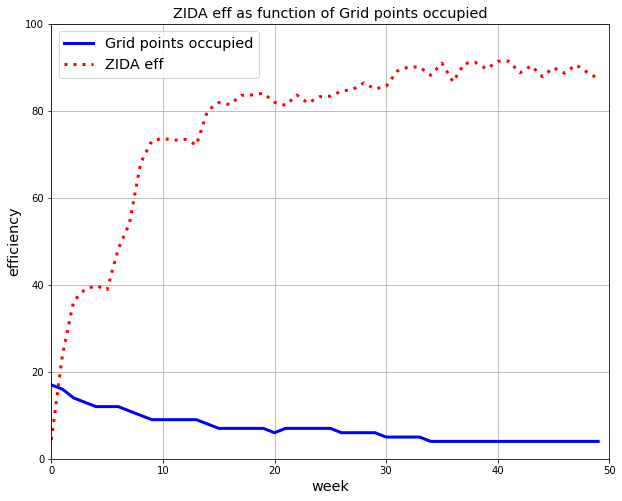

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))  
ax.plot(min_lengths, label = 'Grid points occupied', linestyle = 'solid', color='blue', lw =3)
ax.plot(data_table_7, label = 'ZIDA eff', linestyle = (0, (1, 2)), color='red', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, num_weeks)
ax.set_ybound(0, 100)
ax.grid()
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('ZIDA eff as function of Grid points occupied', size = 'x-large')
ax.legend(fontsize='x-large')